# **Prerequisites**

In [1]:
## Import Packages ##
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

**  **

# **SEIR Model**

## **1. Initialization**

### **Initial conditions**

In [2]:
## Initial conditions ##
N_0 = 103342110  # initial total population
S_0 = 103202639  # Susceptible population
E_0 = 8156        # Exposed population
I_0 = 18958       # Infected population
R_0 = 112826      # Recovered population
D_0 = 7687        # Dead population 

### **Parameters**

In [3]:
r_naught = 2.5    # Basic reproduction number of coronavirus
alpha = 0.0647    # Death rate caused by covid-19
beta = 0.1785     # Probability of infection
gamma = 0.0714    # Recovery rate
e = 0.1667        # Rate of transmission from exposed to infected
v= 0.0000784      # Birth rate
m= 0.0000171      # Natural death rate
rho = 0.0714

**   **

## **2. Analytical Solution**

## **2.1. Without Vital Dynamics**

### **Model Equations**

In [4]:
def seir (y, t, r_naught, alpha, beta, gamma, e, v, m, rho):
  S, E, I, R, D, N = y
  dSdt= -beta*S*(I/N) 
  dEdt= beta*S*(I/N) - e*E
  dIdt = e*E - (1-alpha)*gamma*I - alpha*rho*I
  dRdt= (1-alpha)*gamma*I 
  dDdt= alpha*rho*I 
  dNdt = dSdt + dEdt + dIdt + dRdt
  return dSdt, dEdt, dIdt, dRdt, dDdt, dNdt

### **Solution**

In [5]:
#t = np.linspace(0,200) # Time points from 0 to 100 days
t = list(range(0,200,4))
t = np.array(t)
Y0 = S_0, E_0, I_0, R_0, D_0, N_0  # Intitial conditions vector
solution = odeint(seir, Y0, t, args=(r_naught, alpha, beta, gamma, e, v, m,rho))
solution_array = np.array(solution) 

In [6]:
solution_array.shape

(50, 6)

In [7]:
max_i = max(solution_array[:,2])
max_d = max(solution_array[:,4])
print('Maximum number of infections: ', max_i, 'At day: ', np.argmax(solution_array[:,2])*4)
print('Maximum number of deaths: ', max_d, 'At day: ', np.argmax(solution_array[:,4])*4)

Maximum number of infections:  16958312.862808652 At day:  144
Maximum number of deaths:  5548688.790751902 At day:  196


### **Simulation**

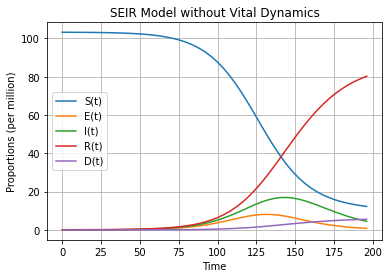

In [8]:
plt.figure(figsize= [6,4])
plt.plot(t,solution_array[:,0]/10**6, label = "S(t)")
plt.plot(t,solution_array[:,1]/10**6, label = "E(t)")
plt.plot(t,solution_array[:,2]/10**6, label = "I(t)")
plt.plot(t,solution_array[:,3]/10**6, label = "R(t)")
plt.plot(t,solution_array[:,4]/10**6, label = "D(t)")
plt.grid()
plt.legend()
plt.xlabel("Time")
plt.ylabel("Proportions (per million)")
plt.title('SEIR Model without Vital Dynamics')
plt.savefig('SEIR_analytical.jpg')
plt.show()

## **2.2. With Vital Dynamics**

### **Model Equations**

In [9]:
def vital (y, t, r_naught, alpha, beta, gamma, e, v, m, rho):
  S, E, I, R, D, N = y
  dSdt= v*N - m*S - beta*S*(I/N) 
  dEdt= beta*S*(I/N) - (m+e)*E
  dIdt = e*E - (1-alpha)*gamma*I - alpha*rho*I - m*I
  dRdt= (1-alpha)*gamma*I - m*R
  dDdt= alpha*rho*I 
  dNdt = dSdt + dEdt + dIdt + dRdt
  return dSdt, dEdt, dIdt, dRdt, dDdt, dNdt

### **Solution**

In [10]:
t = np.linspace(0,200) # Time points from 0 to 100 days
Y0 = S_0, E_0, I_0, R_0, D_0, N_0  # Intitial conditions vector
solution2 = odeint(vital, Y0, t, args=(r_naught, alpha, beta, gamma, e, v, m,rho))
solution_array2 = np.array(solution2) 

### **Simulation**

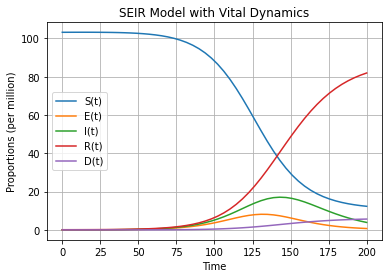

In [11]:
plt.figure(figsize= [6,4])
plt.plot(t,solution_array2[:,0]/10**6, label = "S(t)")
plt.plot(t,solution_array2[:,1]/10**6, label = "E(t)")
plt.plot(t,solution_array2[:,2]/10**6, label = "I(t)")
plt.plot(t,solution_array2[:,3]/10**6, label = "R(t)")
plt.plot(t,solution_array2[:,4]/10**6, label = "D(t)")
plt.grid()
plt.legend()
plt.xlabel("Time")
plt.ylabel("Proportions (per million)")
plt.title('SEIR Model with Vital Dynamics')
plt.savefig('SEIR_vital_analytical.jpg')
plt.show()

**   **

## **3. Numerical Solution**

## **3.1. Euler's Method**

## **Without Vital Dynamics**

### **Initializing vectors**

In [12]:
S_arr = list(range(0,200))
E_arr = list(range(0,200))
I_arr = list(range(0,200))
R_arr = list(range(0,200))
N_arr = list(range(0,200))
D_arr = list(range(0,200))
delta_t = 1

### **Forward Euler Iterations**

In [17]:
for n in range (0,200):
  if n == 0:
    S_arr[0] = S_0
    E_arr[0] = E_0
    I_arr[0] = I_0
    R_arr[0] = R_0
    N_arr[0] = N_0
    D_arr[0] = D_0
  else:
    S_arr[n] = (S_arr[n-1] + delta_t*(-beta*S_arr[n-1]*(I_arr[n-1]/N_arr[n-1])))
    E_arr[n] = (E_arr[n-1] + delta_t*(beta*S_arr[n-1]*(I_arr[n-1]/N_arr[n-1]) - e*E_arr[n-1]))
    I_arr[n] = (I_arr[n-1] + delta_t*(e*E_arr[n-1] - ((1-alpha)*gamma+alpha*rho)*I_arr[n-1]))
    R_arr[n] = (R_arr[n-1] + delta_t*((1-alpha)*gamma*I_arr[n-1]))
    D_arr[n] = (D_arr[n-1] + delta_t*(alpha*rho*I_arr[n-1]))
    N_arr[n] = (S_arr[n] + E_arr[n] + I_arr[n] + R_arr[n])

In [18]:
max_I = max(I_arr)
max_D = max(D_arr)
print('Maximum number of infections: ', max_I, 'At day: ', np.argmax(I_arr))
print('Maximum number of deaths: ', max_D, 'At day: ', np.argmax(D_arr))

Maximum number of infections:  17256429.837044146 At day:  146
Maximum number of deaths:  5595567.287950743 At day:  199


### **Simulation**

In [20]:
## scaling for plotting ##
S_scale = [x / 10**6 for x in S_arr]
E_scale = [x / 10**6 for x in E_arr]
I_scale = [x / 10**6 for x in I_arr]
R_scale = [x / 10**6 for x in R_arr]
D_scale = [x / 10**6 for x in D_arr]

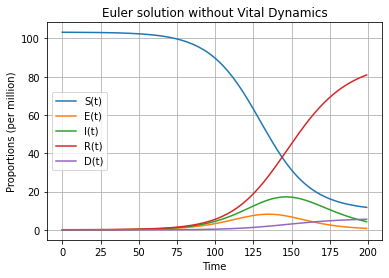

In [21]:
t= list(range(0,200))
plt.figure(figsize= [6,4])
plt.plot(t,S_scale, label = "S(t)")
plt.plot(t,E_scale, label = "E(t)")
plt.plot(t,I_scale, label = "I(t)")
plt.plot(t,R_scale, label = "R(t)")
plt.plot(t,D_scale, label = "D(t)")
plt.grid()
plt.legend()
plt.xlabel("Time")
plt.ylabel("Proportions (per million)")
plt.title('Euler solution without Vital Dynamics')
plt.savefig('SEIR_euler.jpg')
plt.show()

### **Euler Vs Analytical Solution**

In [22]:
## Picking solutions at similar time points of the analytical solution ##
S_n = []
E_n = []
I_n = []
R_n = []
D_n = []
for j in range(0,200,4):
  S_n.append(S_arr[j])
  E_n.append(E_arr[j])
  I_n.append(I_arr[j])
  R_n.append(R_arr[j])
  D_n.append(D_arr[j])


No handles with labels found to put in legend.


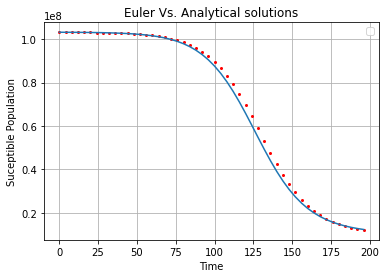

In [23]:
## Comparing Susceptible population solutions ##
t = list(range(0,200,4))
plt.figure(figsize= [6,4])
plt.plot(t,S_n, 'ro', linewidth=1, markersize=2)
plt.plot(t,solution_array[:,0])
plt.grid()
plt.legend()
plt.xlabel("Time")
plt.ylabel("Suceptible Population")
plt.title("Euler Vs. Analytical solutions")
plt.savefig('Euler_analytical_S.jpg')
plt.show()

No handles with labels found to put in legend.


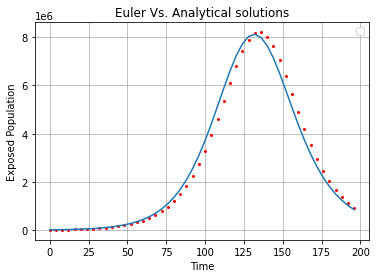

In [24]:
## Comparing Exposed population solutions ##
plt.figure(figsize= [6,4])
plt.plot(t,E_n, 'ro', linewidth=1, markersize=2)
plt.plot(t,solution_array[:,1])
plt.grid()
plt.legend()
plt.xlabel("Time")
plt.ylabel("Exposed Population")
plt.title("Euler Vs. Analytical solutions")
plt.savefig('Euler_analytical_E.jpg')
plt.show()

No handles with labels found to put in legend.


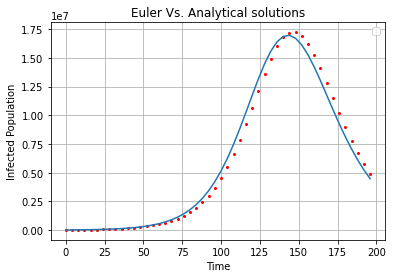

In [25]:
## Comparing Infected population solutions ##
plt.figure(figsize= [6,4])
plt.plot(t,I_n, 'ro', linewidth=1, markersize=2)
plt.plot(t,solution_array[:,2])
plt.grid()
plt.legend()
plt.xlabel("Time")
plt.ylabel("Infected Population")
plt.title("Euler Vs. Analytical solutions")
plt.savefig('Euler_analytical_I.jpg')
plt.show()

No handles with labels found to put in legend.


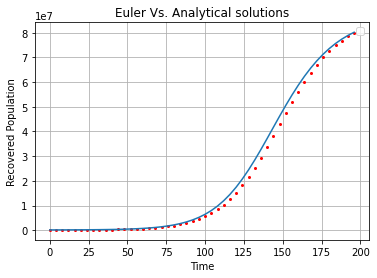

In [26]:
## Comparing Recovered population solutions ##
plt.figure(figsize= [6,4])
plt.plot(t,R_n, 'ro', linewidth=1, markersize=2)
plt.plot(t,solution_array[:,3])
plt.grid()
plt.legend()
plt.xlabel("Time")
plt.ylabel("Recovered Population")
plt.title("Euler Vs. Analytical solutions")
plt.savefig('Euler_analytical_R.jpg')
plt.show()

No handles with labels found to put in legend.


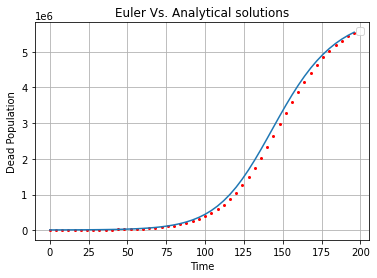

In [27]:
## Comparing Dead population solutions ##
t= list(range(0,200,4))
plt.figure(figsize= [6,4])
plt.plot(t,D_n, 'ro', linewidth=1, markersize=2)
plt.plot(t,solution_array[:,4])
plt.grid()
plt.legend()
plt.xlabel("Time")
plt.ylabel("Dead Population")
plt.title("Euler Vs. Analytical solutions")
plt.savefig('Euler_analytical_D.jpg')
plt.show()

## **3.2. Heun's Method**

### **Initializing vectors**

In [28]:
S_arr = list(range(0,200))
E_arr = list(range(0,200))
I_arr = list(range(0,200))
R_arr = list(range(0,200))
N_arr = list(range(0,200))
D_arr = list(range(0,200))
delta_t = 1

### **Heun's iterations**

In [29]:
for n in range (0,200):
  if n == 0:
    S_arr[0] = S_0
    E_arr[0] = E_0
    I_arr[0] = I_0
    R_arr[0] = R_0
    N_arr[0] = N_0
    D_arr[0] = D_0
  else:
   # y_intermediate = y[i-1] + h*y1(t[i-1],y[i-1])
   # y[i] = y[i-1] + (h/2.0)*(y1(t[i-1],y[i-1]) + y1(t[i],y_intermediate))
    
    S_inter = S_arr[n-1] + delta_t*(-beta*S_arr[n-1]*(I_arr[n-1]/N_arr[0]))
    E_inter = (E_arr[n-1] + delta_t*(beta*S_arr[n-1]*(I_arr[n-1]/N_arr[0]) - e*E_arr[n-1]))
    I_inter = (I_arr[n-1] + delta_t*(e*E_arr[n-1] - ((1-alpha)*gamma+alpha*rho)*I_arr[n-1]))
    R_inter = (R_arr[n-1] + delta_t*((1-alpha)*gamma*I_arr[n-1]))
    D_inter = (D_arr[n-1] + delta_t*(alpha*rho*I_arr[n-1]))
 
    
    S_left = -beta*S_arr[n-1]*(I_arr[n-1]/N_arr[0])
    E_left = beta*S_arr[n-1]*(I_arr[n-1]/N_arr[0]) - e*E_arr[n-1]
    I_left = e*E_arr[n-1] - ((1-alpha)*gamma+alpha*rho)*I_arr[n-1]
    R_left = (1-alpha)*gamma*I_arr[n-1]
    D_left = alpha*rho*I_arr[n-1]
   

    S_right = -beta*S_inter*(I_inter/N_0)
    E_right = beta*S_inter*(I_inter/N_0) - e*E_inter
    I_right = e*E_inter - ((1-alpha)*gamma+alpha*rho)*I_inter
    R_right = (1-alpha)*gamma*I_inter
    D_right = alpha*rho*I_inter
    

    S_arr[n] = S_arr[n-1] + (0.5)*(S_left+S_right)
    E_arr[n] = E_arr[n-1] + (0.5)*(E_left+E_right)
    I_arr[n] = I_arr[n-1] + (0.5)*(I_left+ I_right)
    R_arr[n] = R_arr[n-1] + (0.5)*(R_left+ R_right) 
    D_arr[n] = D_arr[n-1] + (0.5)*(D_left+ D_right)  
      


In [ ]:
max_I = max(I_arr)
max_D = max(D_arr)
print('Maximum number of infections: ', max_I, 'At day: ', np.argmax(I_arr))
print('Maximum number of deaths: ', max_D, 'At day: ', np.argmax(D_arr))

Maximum number of infections:  16653723.910339436 At day:  143
Maximum number of deaths:  5534481.858732906 At day:  199


### **Simultion**

In [ ]:
## scaling for plotting ##
S_scale = [x / 10**6 for x in S_arr]
E_scale = [x / 10**6 for x in E_arr]
I_scale = [x / 10**6 for x in I_arr]
R_scale = [x / 10**6 for x in R_arr]
D_scale = [x / 10**6 for x in D_arr]

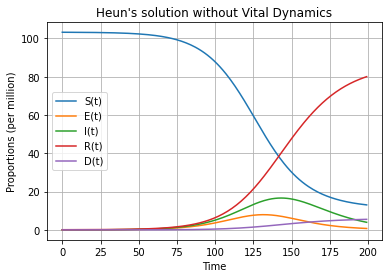

In [ ]:
t= list(range(0,200))
plt.figure(figsize= [6,4])
plt.plot(t,S_scale, label = "S(t)")
plt.plot(t,E_scale, label = "E(t)")
plt.plot(t,I_scale, label = "I(t)")
plt.plot(t,R_scale, label = "R(t)")
plt.plot(t,D_scale, label = "D(t)")
plt.grid()
plt.legend()
plt.xlabel("Time")
plt.ylabel("Proportions (per million)")
plt.title("Heun's solution without Vital Dynamics")
plt.savefig('SEIR_heun.jpg')
plt.show()

### **Heun's vs Analytical**

In [ ]:
## Picking solutions at similar time points of the analytical solution ##
S_n = []
E_n = []
I_n = []
R_n = []
D_n = []
for j in range(0,200,4):
  S_n.append(S_arr[j])
  E_n.append(E_arr[j])
  I_n.append(I_arr[j])
  R_n.append(R_arr[j])
  D_n.append(D_arr[j])


No handles with labels found to put in legend.


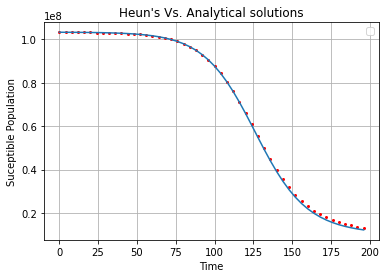

In [ ]:
## Comparing Susceptible population solutions ##
t = list(range(0,200,4))
plt.figure(figsize= [6,4])
plt.plot(t,S_n, 'ro', linewidth=1, markersize=2)
plt.plot(t,solution_array[:,0])
plt.grid()
plt.legend()
plt.xlabel("Time")
plt.ylabel("Suceptible Population")
plt.title("Heun's Vs. Analytical solutions")
plt.savefig('Heun_analytical_S.jpg')
plt.show()

No handles with labels found to put in legend.


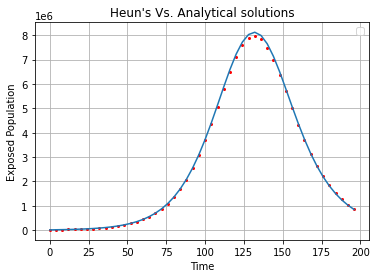

In [ ]:
## Comparing Exposed population solutions ##
plt.figure(figsize= [6,4])
plt.plot(t,E_n, 'ro', linewidth=1, markersize=2)
plt.plot(t,solution_array[:,1])
plt.grid()
plt.legend()
plt.xlabel("Time")
plt.ylabel("Exposed Population")
plt.title("Heun's Vs. Analytical solutions")
plt.savefig('Heun_analytical_E.jpg')
plt.show()

No handles with labels found to put in legend.


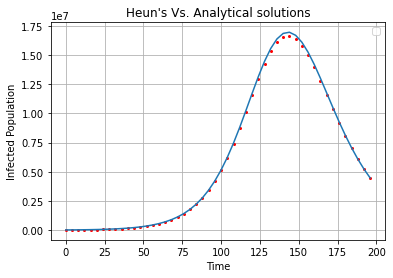

In [ ]:
## Comparing Infected population solutions ##
plt.figure(figsize= [6,4])
plt.plot(t,I_n, 'ro', linewidth=1, markersize=2)
plt.plot(t,solution_array[:,2])
plt.grid()
plt.legend()
plt.xlabel("Time")
plt.ylabel("Infected Population")
plt.title("Heun's Vs. Analytical solutions")
plt.savefig('Heun_analytical_I.jpg')
plt.show()

No handles with labels found to put in legend.


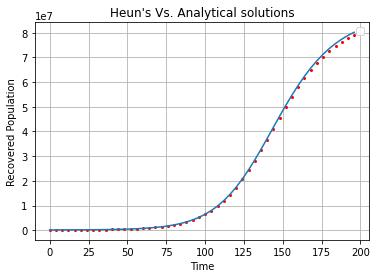

In [ ]:
## Comparing Recovered population solutions ##
plt.figure(figsize= [6,4])
plt.plot(t,R_n, 'ro', linewidth=1, markersize=2)
plt.plot(t,solution_array[:,3])
plt.grid()
plt.legend()
plt.xlabel("Time")
plt.ylabel("Recovered Population")
plt.title("Heun's Vs. Analytical solutions")
plt.savefig('Heun_analytical_R.jpg')
plt.show()

No handles with labels found to put in legend.


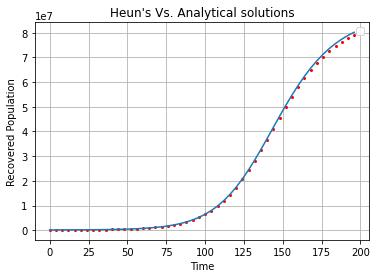

In [ ]:
## Comparing Recovered population solutions ##
plt.figure(figsize= [6,4])
plt.plot(t,R_n, 'ro', linewidth=1, markersize=2)
plt.plot(t,solution_array[:,3])
plt.grid()
plt.legend()
plt.xlabel("Time")
plt.ylabel("Recovered Population")
plt.title("Heun's Vs. Analytical solutions")
plt.savefig('Heun_analytical_R.jpg')
plt.show()

No handles with labels found to put in legend.


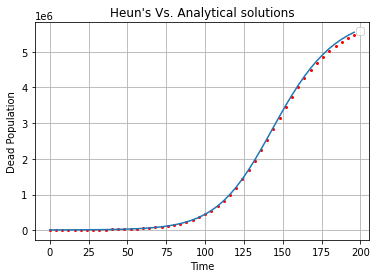

In [ ]:
## Comparing Dead population solutions ##
t= list(range(0,200,4))
plt.figure(figsize= [6,4])
plt.plot(t,D_n, 'ro', linewidth=1, markersize=2)
plt.plot(t,solution_array[:,4])
plt.grid()
plt.legend()
plt.xlabel("Time")
plt.ylabel("Dead Population")
plt.title("Heun's Vs. Analytical solutions")
plt.savefig('Heun_analytical_D.jpg')
plt.show()

## **3.3. Runge Kutta 4**

### **Initializing vectors**

In [ ]:
S_arr = list(range(0,200))
E_arr = list(range(0,200))
I_arr = list(range(0,200))
R_arr = list(range(0,200))
N_arr = list(range(0,200))
D_arr = list(range(0,200))
delta_t = 1

### **RK4 iterations**

In [30]:
for n in range (0,200):
  if n == 0:
    S_arr[0] = S_0
    E_arr[0] = E_0
    I_arr[0] = I_0
    R_arr[0] = R_0
    N_arr[0] = N_0
    D_arr[0] = D_0
  else:
  
    
    S1 = delta_t*(-beta*S_arr[n-1]*(I_arr[n-1]/N_arr[0]))
    E1 = delta_t*(beta*S_arr[n-1]*(I_arr[n-1]/N_arr[0]) - e*E_arr[n-1])
    I1 = delta_t*(e*E_arr[n-1] - ((1-alpha)*gamma+alpha*rho)*I_arr[n-1])
    R1 = delta_t*((1-alpha)*gamma*I_arr[n-1])
    D1 = delta_t*(alpha*rho*I_arr[n-1])
 
    S2 = -beta*(S_arr[n-1]+0.5*S1)*((I_arr[n-1]+0.5*I1)/N_0)
    E2 = beta*(S_arr[n-1]+0.5*S1)*((I_arr[n-1]+0.5*I1)/N_0) - e*(E_arr[n-1]+0.5*E1)
    I2 = e*(E_arr[n-1]+0.5*E1) - ((1-alpha)*gamma+alpha*rho)*(I_arr[n-1]+0.5*I1)
    R2 = (1-alpha)*gamma*(I_arr[n-1]+0.5*I1)
    D2 = alpha*rho*(I_arr[n-1]+0.5*I1)


    S3 = -beta*(S_arr[n-1]+0.5*S2)*((I_arr[n-1]+0.5*I2)/N_0)
    E3 = beta*(S_arr[n-1]+0.5*S2)*((I_arr[n-1]+0.5*I2)/N_0) - e*(E_arr[n-1]+0.5*E2)
    I3 = e*(E_arr[n-1]+0.5*E2) - ((1-alpha)*gamma+alpha*rho)*(I_arr[n-1]+0.5*I2)
    R3 = (1-alpha)*gamma*(I_arr[n-1]+0.5*I2)
    D3 = alpha*rho*(I_arr[n-1]+0.5*I2)
    
    S4 = -beta*(S_arr[n-1]+S3)*((I_arr[n-1]+I3)/N_0)
    E4 = beta*(S_arr[n-1]+S3)*((I_arr[n-1]+I3)/N_0) - e*(E_arr[n-1]+E3)
    I4 = e*(E_arr[n-1]+E3) - ((1-alpha)*gamma+alpha*rho)*(I_arr[n-1]+I3)
    R4 = (1-alpha)*gamma*(I_arr[n-1]+I3)
    D4 = alpha*rho*(I_arr[n-1]+I3)
    

    S_arr[n] = S_arr[n-1] + (1.0/6.0)*(S1 + 2*S2 + 2*S3 + S4)
    E_arr[n] = E_arr[n-1] + (1.0/6.0)*(E1 + 2*E2 + 2*E3 + E4)
    I_arr[n] = I_arr[n-1] + (1.0/6.0)*(I1 + 2*I2 + 2*I3 + I4)
    R_arr[n] = R_arr[n-1] + (1.0/6.0)*(R1 + 2*R2 + 2*R3 + R4) 
    D_arr[n] = D_arr[n-1] + (1.0/6.0)*(D1 + 2*D2 + 2*D3 + D4)  
      

In [31]:
max_I = max(I_arr)
max_D = max(D_arr)
print('Maximum number of infections: ', max_I, 'At day: ', np.argmax(I_arr))
print('Maximum number of deaths: ', max_D, 'At day: ', np.argmax(D_arr))

Maximum number of infections:  16655271.07523403 At day:  143
Maximum number of deaths:  5535693.102775095 At day:  199


### **Simulation**

In [34]:
## scaling for plotting ##
S_scale = [x / 10**6 for x in S_arr]
E_scale = [x / 10**6 for x in E_arr]
I_scale = [x / 10**6 for x in I_arr]
R_scale = [x / 10**6 for x in R_arr]
D_scale = [x / 10**6 for x in D_arr]

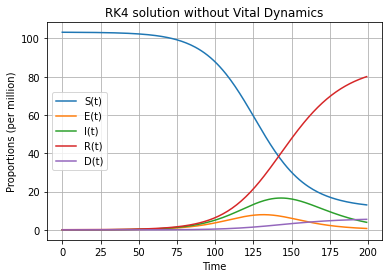

In [36]:
t= list(range(0,200))
plt.figure(figsize= [6,4])
plt.plot(t,S_scale, label = "S(t)")
plt.plot(t,E_scale, label = "E(t)")
plt.plot(t,I_scale, label = "I(t)")
plt.plot(t,R_scale, label = "R(t)")
plt.plot(t,D_scale, label = "D(t)")
plt.grid()
plt.legend()
plt.xlabel("Time")
plt.ylabel("Proportions (per million)")
plt.title("RK4 solution without Vital Dynamics")
plt.savefig('SEIR_RK4.jpg')
plt.show()

### **RK4 vs Analytical**

In [37]:
## Picking solutions at similar time points of the analytical solution ##
S_n = []
E_n = []
I_n = []
R_n = []
D_n = []
for j in range(0,200,4):
  S_n.append(S_arr[j])
  E_n.append(E_arr[j])
  I_n.append(I_arr[j])
  R_n.append(R_arr[j])
  D_n.append(D_arr[j])

No handles with labels found to put in legend.


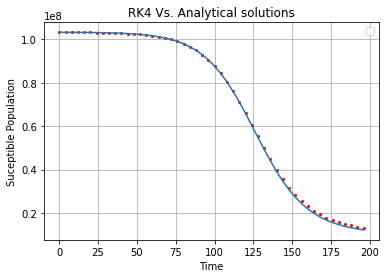

In [38]:
## Comparing Susceptible population solutions ##
t = list(range(0,200,4))
plt.figure(figsize= [6,4])
plt.plot(t,S_n, 'ro', linewidth=1, markersize=2)
plt.plot(t,solution_array[:,0])
plt.grid()
plt.legend()
plt.xlabel("Time")
plt.ylabel("Suceptible Population")
plt.title("RK4 Vs. Analytical solutions")
plt.savefig('RK4_analytical_S.jpg')
plt.show()

No handles with labels found to put in legend.


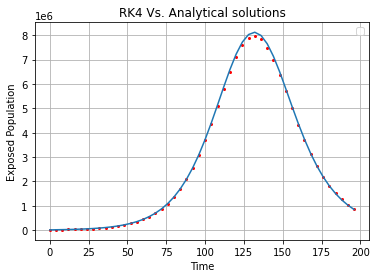

In [39]:
## Comparing Exposed population solutions ##
plt.figure(figsize= [6,4])
plt.plot(t,E_n, 'ro', linewidth=1, markersize=2)
plt.plot(t,solution_array[:,1])
plt.grid()
plt.legend()
plt.xlabel("Time")
plt.ylabel("Exposed Population")
plt.title("RK4 Vs. Analytical solutions")
plt.savefig('RK4_analytical_E.jpg')
plt.show()

No handles with labels found to put in legend.


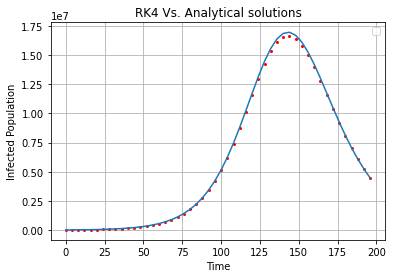

In [40]:
## Comparing Infected population solutions ##
plt.figure(figsize= [6,4])
plt.plot(t,I_n, 'ro', linewidth=1, markersize=2)
plt.plot(t,solution_array[:,2])
plt.grid()
plt.legend()
plt.xlabel("Time")
plt.ylabel("Infected Population")
plt.title("RK4 Vs. Analytical solutions")
plt.savefig('RK4_analytical_I.jpg')
plt.show()

No handles with labels found to put in legend.


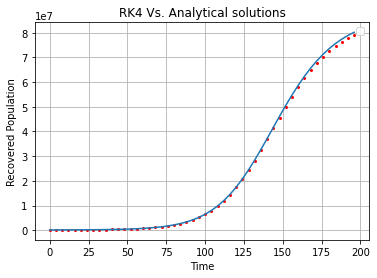

In [41]:
## Comparing Recovered population solutions ##
plt.figure(figsize= [6,4])
plt.plot(t,R_n, 'ro', linewidth=1, markersize=2)
plt.plot(t,solution_array[:,3])
plt.grid()
plt.legend()
plt.xlabel("Time")
plt.ylabel("Recovered Population")
plt.title("RK4 Vs. Analytical solutions")
plt.savefig('RK4_analytical_R.jpg')
plt.show()

No handles with labels found to put in legend.


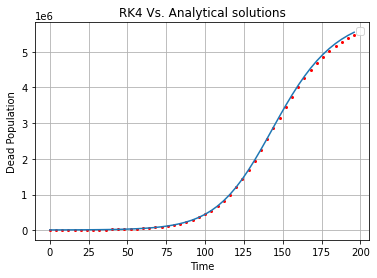

In [42]:
## Comparing Dead population solutions ##
t= list(range(0,200,4))
plt.figure(figsize= [6,4])
plt.plot(t,D_n, 'ro', linewidth=1, markersize=2)
plt.plot(t,solution_array[:,4])
plt.grid()
plt.legend()
plt.xlabel("Time")
plt.ylabel("Dead Population")
plt.title("RK4 Vs. Analytical solutions")
plt.savefig('RK4_analytical_D.jpg')
plt.show()